# Data Loading

In [9]:
#Data loading

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [10]:
df1 = pd.read_csv(r"C:\Users\Sneh\Documents\SEM6MATERIALS\Mini Project\Bengaluru_House_DataCSV.csv")
df1.head() 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Country
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,India
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,India
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,India
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,India
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,India


In [11]:
df1.shape

(13320, 10)

In [12]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'Country'],
      dtype='object')

In [13]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [14]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [15]:
#dropping the column that we don't need for price prediction
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 6)

In [16]:
df2.head()

,location,size,total_sqft,bath,price,Country
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,India
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,India
2,Uttarahalli,3 BHK,1440,2.0,62.00,India
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,India
4,Kothanur,2 BHK,1200,2.0,51.00,India


# Data Cleaning

In [17]:
#checking for null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
Country        0
dtype: int64

In [18]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
Country       0
dtype: int64

In [19]:
df3.shape

(13246, 6)

In [20]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
#4 bedrooms and 4 bhk are indentical; so remove duplicate and make new feature(column)
# Feature Engineering
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

<ipython-input-21-20ee456333c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [22]:
df3.head()

,location,size,total_sqft,bath,price,Country,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,India,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,India,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,India,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,India,3
4,Kothanur,2 BHK,1200,2.0,51.00,India,2


In [23]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,Country,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,India,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,India,43


In [24]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
#We have to do feature Engineering on total sqft column
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,Country,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,India,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,India,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,India,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,India,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,India,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,India,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,India,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,India,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,India,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,India,4


In [27]:
#take avg of range
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(5)

,location,size,total_sqft,bath,price,Country,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,India,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,India,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,India,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,India,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,India,2


# Feature Engineering

In [29]:
#Add new feature(Column) Price per sqft

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,Country,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,India,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,India,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,India,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,India,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,India,2,4250.000000


In [30]:
#Explore Location column

len(df5.location.unique()) #high dimensity problem generated

1298

In [31]:
#clean space from location and count location using aggeregation

df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Duvasapalya                    1
Zuzuvadi                       1
sapthagiri Layout              1
HAL Layout                     1
Lakshmipura Vidyaanyapura      1
Name: location, Length: 1287, dtype: int64

In [32]:
location_stats.values.sum()

13200

### Dimensionality Reduction

In [33]:
#put all the location with less then 10 data point into "Other" catagory
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

1st Block Koramangala        10
Naganathapura                10
Basapura                     10
Nagadevanahalli              10
BTM 1st Stage                10
                             ..
Duvasapalya                   1
Zuzuvadi                      1
sapthagiri Layout             1
HAL Layout                    1
Lakshmipura Vidyaanyapura     1
Name: location, Length: 1047, dtype: int64

In [34]:
len(df5.location.unique())

1287

In [35]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,Country,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,India,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,India,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,India,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,India,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,India,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,India,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,India,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,India,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,India,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,India,6,36274.509804


# Outlier Removal

In [37]:
# let's assume minimum thresold per bhk to be 300 sqft

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,Country,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,India,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,India,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,India,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,India,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,India,3,20000.000000


In [38]:
df5.shape

(13200, 8)

In [39]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 8)

### Outlier Removal Using Standard Deviation and Mean

In [40]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
#min and ax value are showing wide variation; remove outliers per location using mean and one standard deviation

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.drop(['Country'], axis='columns', inplace=True)
df7.shape

(10242, 7)

In [42]:
df7.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


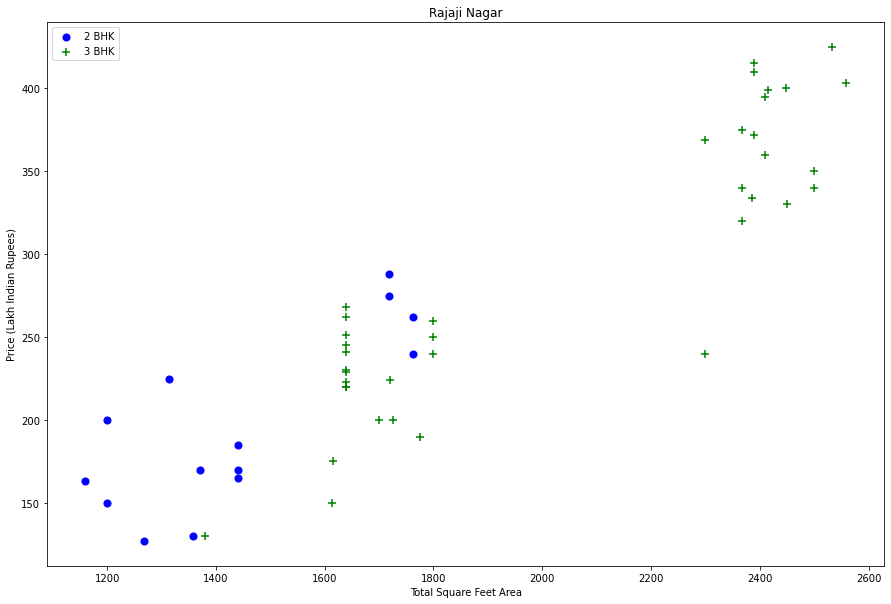

In [43]:
#Visualisation for BHK property with price per sqft

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar") 

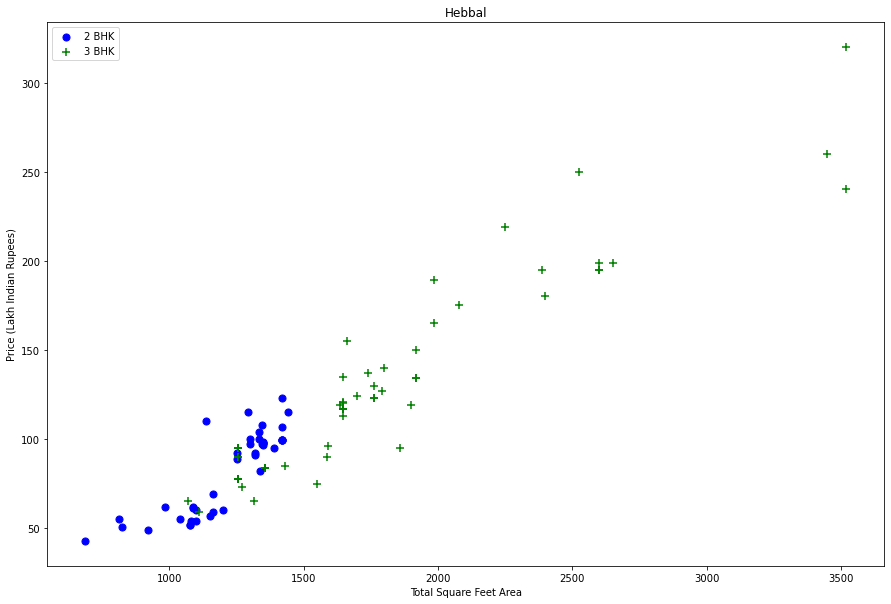

In [44]:
plot_scatter_chart(df7,"Hebbal")

In [45]:
# Outlier at 1700 sqft in chart of Rajaji nagar and 1300 in Hebbel; Price for 3 BHK is less then price for 2 BHK

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape


(7317, 7)

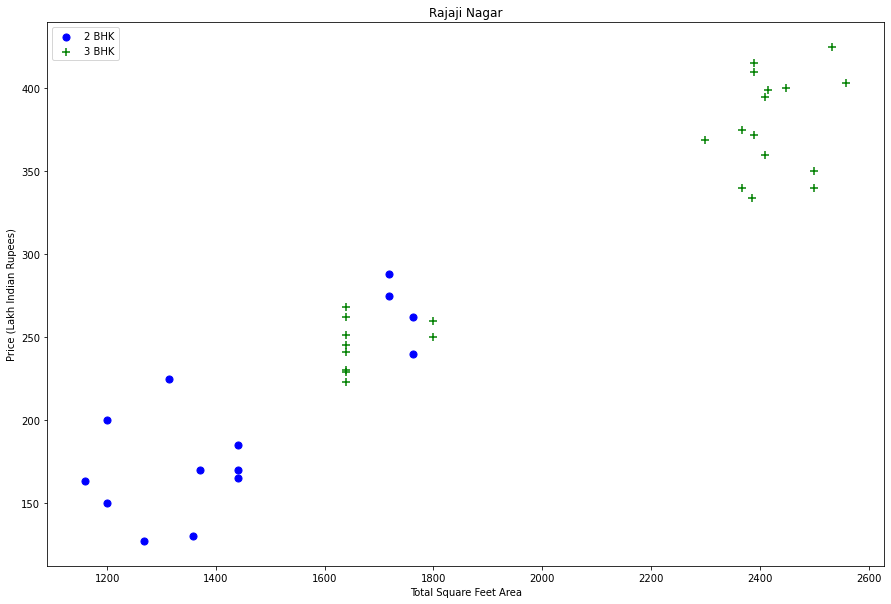

In [46]:
plot_scatter_chart(df8,"Rajaji Nagar")

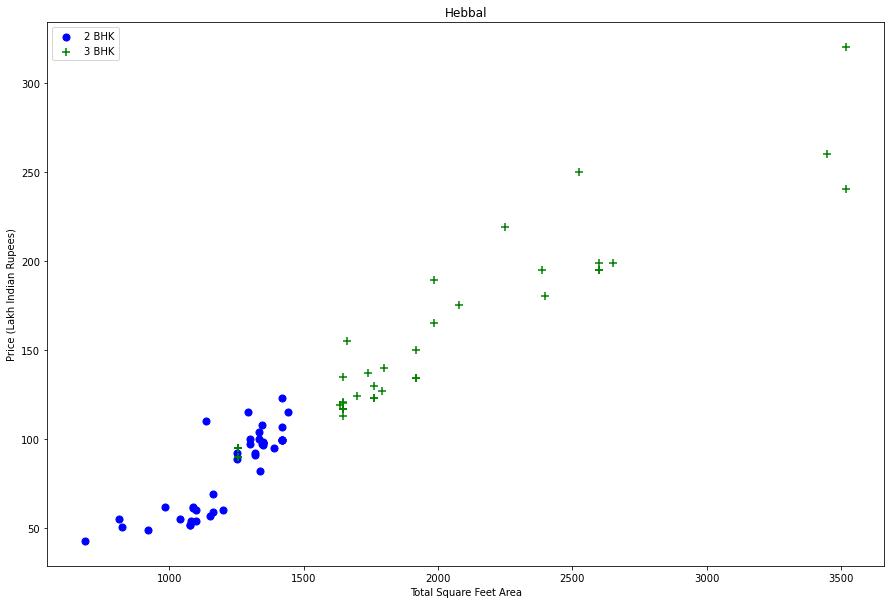

In [47]:
plot_scatter_chart(df8,"Hebbal")

### Before and after outlier removel (Rajaji Nagar)

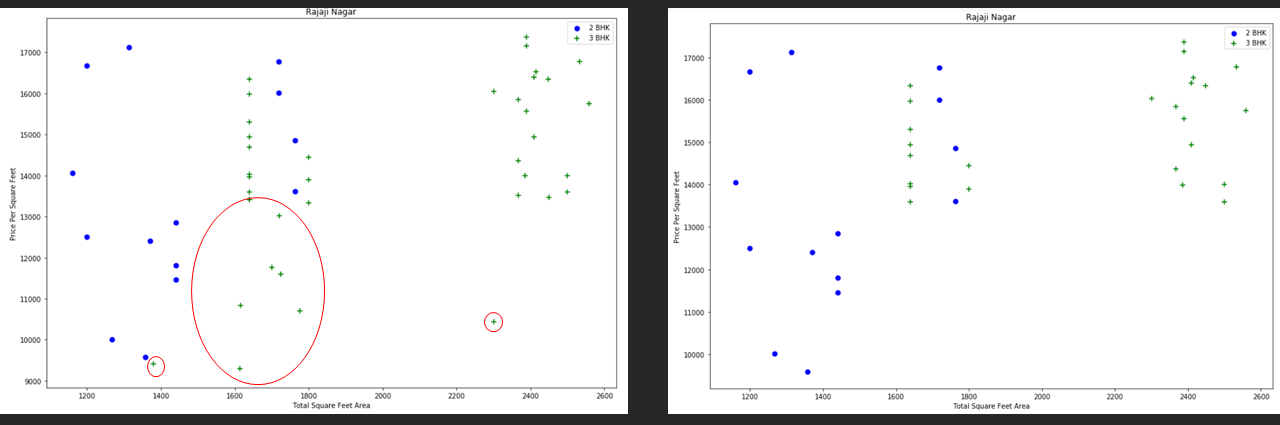

### Before and after outlier removel (Hebbel)

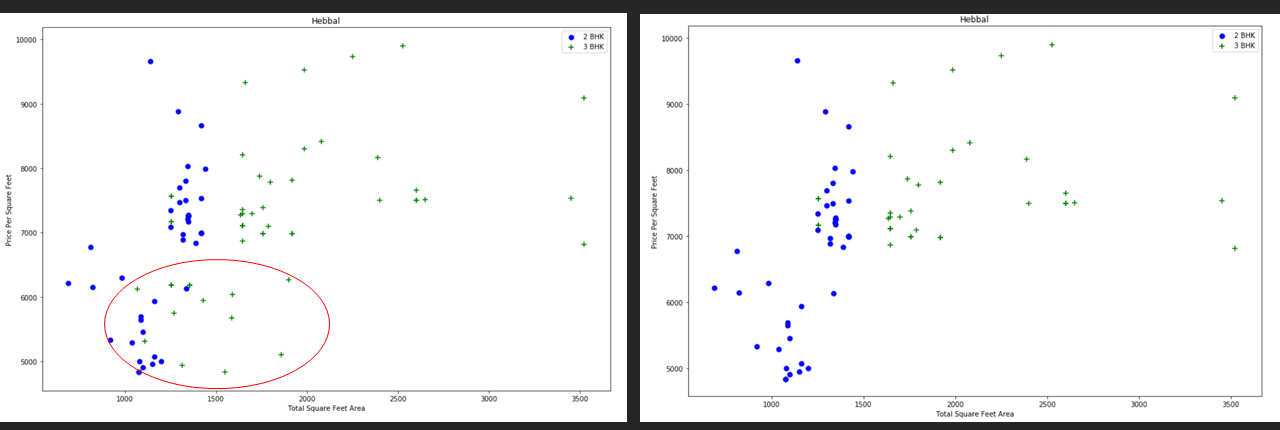

Text(0, 0.5, 'Count')

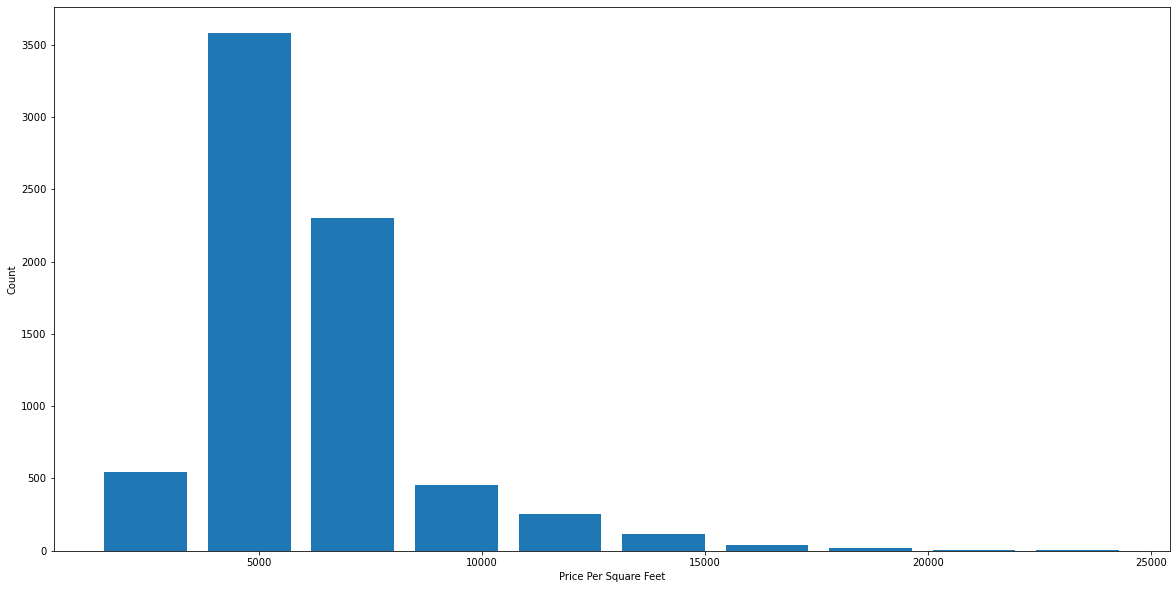

In [48]:
#Histogram:-

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


### Outlier Removal Using Bathrooms Feature

In [49]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

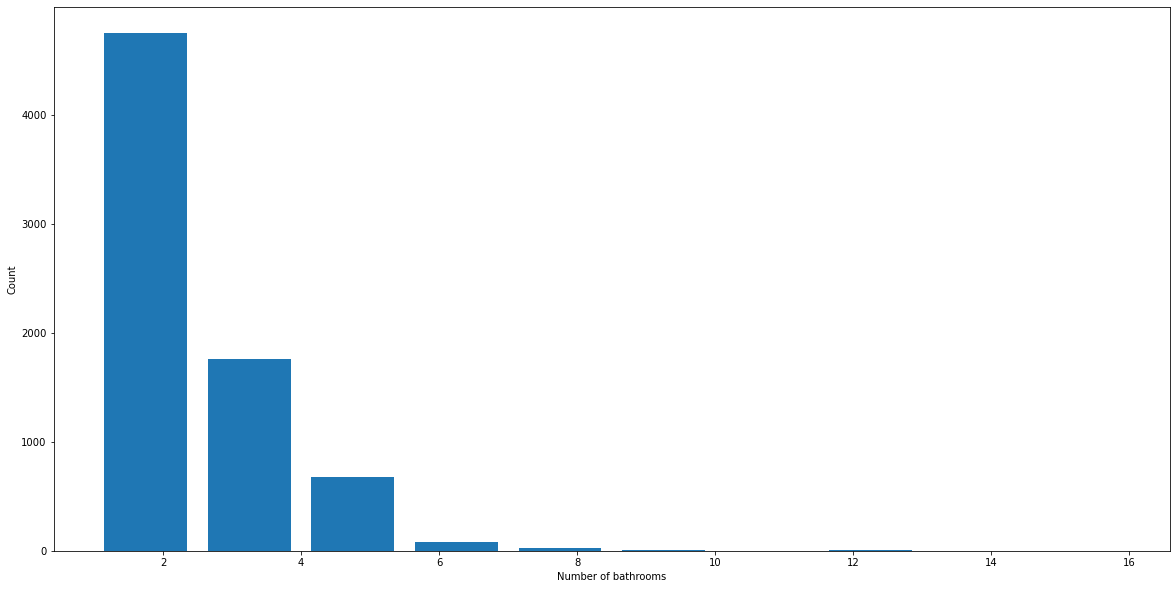

In [51]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [52]:
# Let's assume that 2 more bathrooms than number of bedrooms in a home as a thresold value and remove oulier accordingly.

df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [53]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [54]:
#drop column taht are not necessary
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## One Hot Encoding For Location (Dummies of Pandas)

In [55]:
#Because ML Algo can't read location

dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns') #drop for prevent trape of dummy
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df12 = df11.drop('location',axis='columns')
df12.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [58]:
df12.shape

(7239, 244)

In [59]:
X = df12.drop(['price'],axis='columns') # x should only contain independent values
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) # 20% for testing amd 80% for model training

In [62]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test) #Score of the ML Algo

0.8629132245229443

### K Fold cross validation

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

### Finding best model using GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726785,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.713097,"{'criterion': 'mse', 'splitter': 'best'}"


#### From above table, It's certainly clear that linear regression is the best model to use for the prediction.

## Model Testing

In [65]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [76]:
predict_price('Indira Nagar',1000, 2, 2)

193.31197733179872

In [67]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.0806228498696

In [68]:
predict_price('Indira Nagar',1000, 2, 2)  # Posh Area

193.31197733179872

In [69]:
predict_price('Indira Nagar',1000, 3, 3)

195.52689759854655

# Export the model to a pickle file

In [70]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file as a JSON 

In [71]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))